### What is data science?

- "an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured"

- "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data

- "fourth paradigm" along with theory, experimentation, and computation

- is data science actually a useful term? is it a too-general buzzword?
- how does data science differ from statistics?


In [ ]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
h_1M = mr.MesaData('mesa_data/1M_pre_ms_to_wd/LOGS/history.data')

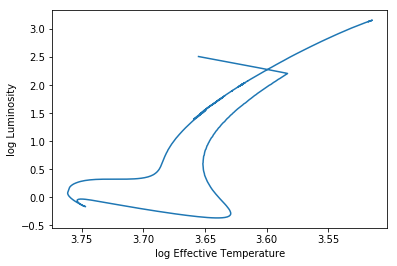

In [4]:
plt.plot(h_1M.log_Teff,h_1M.log_L)
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.gca().invert_xaxis()

In [5]:
h_15M = mr.MesaData('mesa_data/15M_at_TAMS/LOGS/history.data')

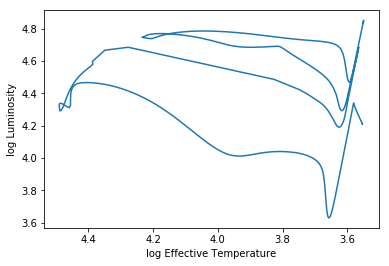

In [6]:
plt.plot(h_15M.log_Teff,h_15M.log_L)
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.gca().invert_xaxis()

[HYG Database](http://www.astronexus.com/hyg)
contains all ~120,000 stars that are either:  

- brighter than a certain magnitude cutoff (magnitude +7.5 to +9.0) or 
- within 50 parsecs (about 160 light years) from the Sun.""


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
stars = pd.read_csv('http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz')

HYG dataset reports flux ratio 'color index' $B-V$; can be transformed to temperature using:
$${\displaystyle T=4600\,\mathrm {K} \left({\frac {1}{0.92(B-V)+1.7}}+{\frac {1}{0.92(B-V)+0.62}}\right).}$$
(Ballesteros 2012)

In [8]:
stars.loc[:,'temp'] = 4600 * (1 / (0.92 * stars.ci + 1.7) + 1 / (0.92 * stars.ci + 0.62))
stars.loc[:,'logtemp'] = np.log10(stars.temp)
stars.loc[:,'loglum'] = np.log10(stars.lum)

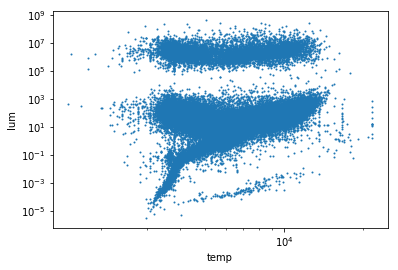

In [9]:
stars.plot.scatter(x='temp', y='lum', loglog=True, s=1)

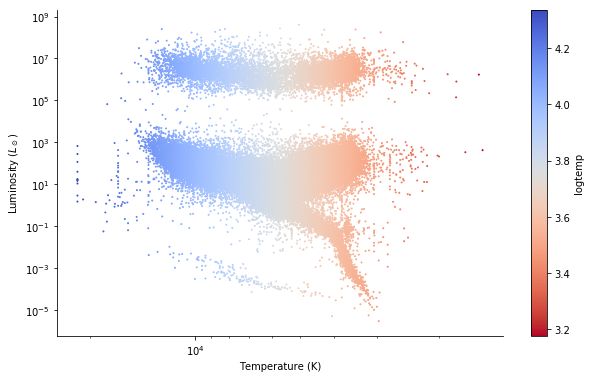

In [10]:
fig, ax = plt.subplots()
stars.plot.scatter(x='temp', y='lum', s=1, 
                loglog=True,
                c='logtemp', colormap='coolwarm_r', 
                ax=ax, figsize=(10,6))
ax.set_xlabel('Temperature (K)'); ax.set_ylabel(r'Luminosity ($L_\odot$)')
ax.invert_xaxis(); sns.despine()

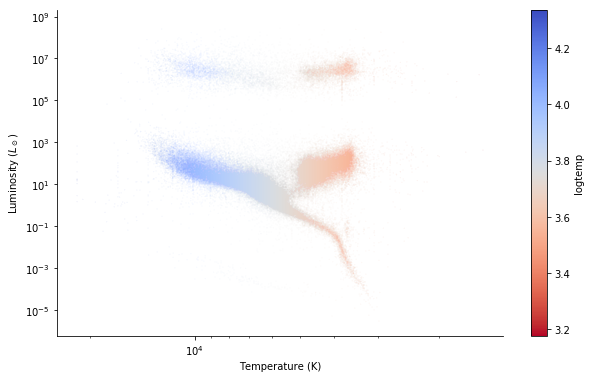

In [11]:
fig, ax = plt.subplots()
stars.plot.scatter(x='temp', y='lum', s=0.001, 
                loglog=True,
                c='logtemp', colormap='coolwarm_r', 
                ax=ax, figsize=(10,6))
ax.set_xlabel('Temperature (K)'); ax.set_ylabel(r'Luminosity ($L_\odot$)')
ax.invert_xaxis(); sns.despine()

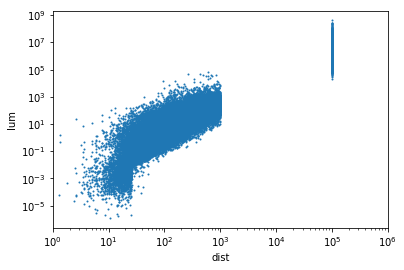

In [12]:
stars.plot.scatter(x='dist', y='lum', s=1, loglog=True, xlim=(1,1e6))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


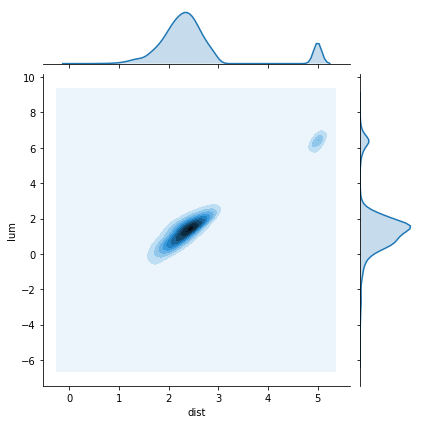

In [16]:
data = np.log10(stars.loc[:,['dist', 'lum']]).replace(
     [np.inf, -np.inf], np.nan).dropna()
sns.jointplot(data=data, x='dist', y='lum', kind='kde')

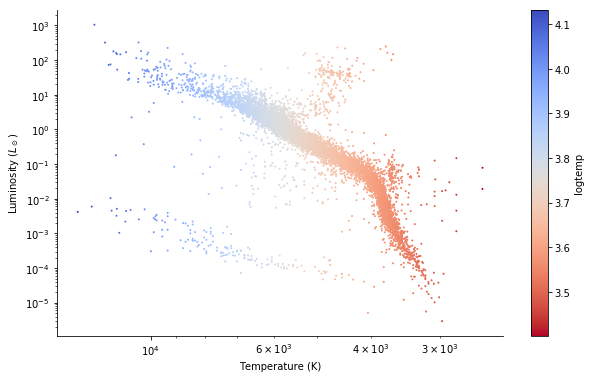

In [17]:
close_stars = stars[stars.dist < 50]
fig, ax = plt.subplots()
close_stars.plot.scatter(x='temp', y='lum', s=1, 
                loglog=True,
                c='logtemp', colormap='coolwarm_r', 
                ax=ax, figsize=(10,6))
ax.set_xlabel('Temperature (K)'); ax.set_ylabel(r'Luminosity ($L_\odot$)')
ax.invert_xaxis(); sns.despine()

In [29]:
from sklearn import mixture, cluster, neighbors
n_clusters =3
bgmm = mixture.BayesianGaussianMixture(n_components=n_clusters, 
    weight_concentration_prior_type='dirichlet_process',
    weight_concentration_prior=1e10)

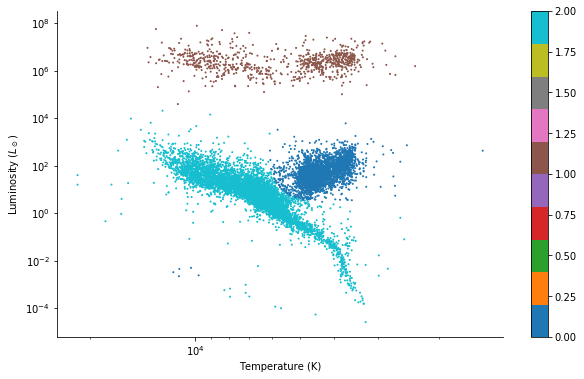

In [30]:
#clustering_data = close_stars.loc[:, ['temp', 'lum']].dropna()
clustering_data = stars.loc[:, ['temp', 'lum']].dropna().sample(10000)

bgmm.fit(np.log10(clustering_data))
labels = bgmm.predict(np.log10(clustering_data))

fig, ax = plt.subplots()
clustering_data.plot.scatter(x='temp', y='lum', s=1, 
                loglog=True, colormap='tab10',
                c=labels, 
                ax=ax, figsize=(10,6))
ax.set_xlabel('Temperature (K)'); ax.set_ylabel(r'Luminosity ($L_\odot$)')
ax.invert_xaxis(); sns.despine()

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_pdf_001.png)